# Método del gradiente descendente 

**Gradiente**: El gradiente es una generalización de la derivada, es el conjunto de todas las derivadas parciales de una función.

El gradiente , evaluado en una entrada $(x_0, y_0)$, apunta en la dirección del ascenso más pronunciado.

El gradiente representa la pendiente en el punto que nos encontremos de la función de coste. Cuanto más «empinada» sea la pendiente, más queremos ir en sentido contrario (para abajo), para minimizar el error.

En muchas de las técnicas de aprendizaje automático, el «aprendizaje» consiste en encontrar qué parámetros W minimizan la función de coste (error cuadrático medio).




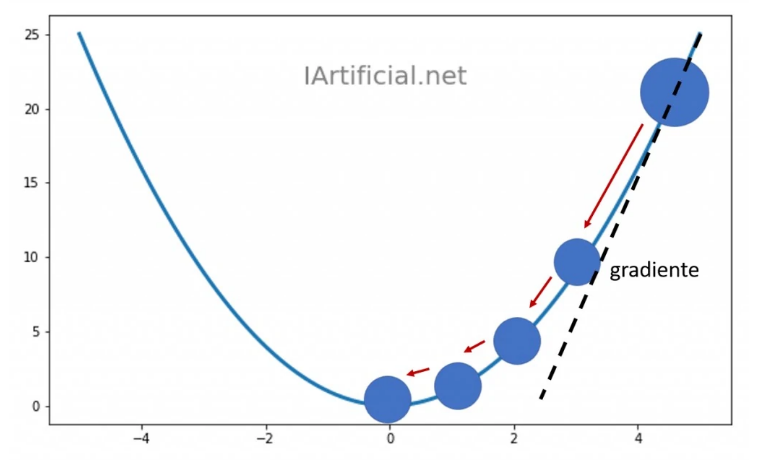

El método del gradiente descendente es un proceso iterativo en que el valor actual de $x$ se corrige sumandole un valor $\bigtriangleup x$ con signo contrario a la derivada (dirección de descenso), hasta alcanzar el punto de mínima.

La ecuación de corrección es:

$x_k = x_{k-1} -\mu \frac{\mathrm{d} }{\mathrm{d} x}f(x_{k-1})$


- Se usa la resta, para ir en la dirección opuesta al gradiente
- A mayor pendiente (más empinado), mayor es el cambio)
- $\mu$, también llamado tasa de aprendizaje, controla el tamaño de la actualización
- Si la tasa de aprendizaje es demasiado grande, los cambios en cada iteración serán también muy grandes y será difícil encontrar los coeficientes que minimicen la función de coste.
- Si la tasa de aprendizaje es demasiado pequeña, el gradiente descendiente tardará mucho en encontrar la solución adecuada.
- El gradiente descendente se puede quedar atrapado en un minimo local, y podríamos creer que encontramos el mínimo global, aunque esto es muy poco probable en problemas de machine learning donde tenemos muchas variables
- Es un método muy susceptible al punto inicial


## Implementación

Vamos a aplicar el método del gradiente descendente para hallar el mínimo de la función $f(x,y)= x^2-xy$, para esto necesitamos hallar el gradiente 

$\frac{\mathrm{d} }{\mathrm{d} x} f(x,y) = 2x-y$

$\frac{\mathrm{d} }{\mathrm{d} y} f(x,y) =-x$


In [43]:
import numpy as np
import pandas as pd 

def f(x, y):
    return x**2-x*y

def g(x, y):
    gx = 2*x-y
    gy = -x
    return (gx, gy)

def improve(x, y, mu):
    gx, gy = g(x, y)
    x = x - mu * gx
    y = y - mu * gy
    return (x, y)

# Almacena la historia de los puntos recorridos
history_x = []
history_y = []
history_f = []

# ---->>> Inserte su codigo aquí ---->>>

df = pd.DataFrame(columns= ["iterations", "x", "y", "f(x,y)"])

iterations = [100, 500, 1000, 2000, 3000]

for i in iterations:
  #el punto inicial
  x = -0.5
  y = 0.2
  for epoch in range(i):
        x, y = improve(x, y, 0.001)      
  history_x.append(x)
  history_y.append(y)
  history_f.append(f(x, y))

df["iterations"]= iterations
df["x"]= history_x
df["y"]= history_y
df["f(x,y)"] = history_f
print(df)

   iterations         x         y    f(x,y)
0         100 -0.393286  0.155497  0.215829
1         500 -0.151653  0.054075  0.031199
2        1000 -0.048166  0.009198  0.002763
3        2000 -0.009708 -0.012248 -0.000025
4        3000 -0.009056 -0.020866 -0.000107
